**QUESTION**: Using a Soccer league dataset analyse which soccer league is the most competitive?

**DataSet**: https://www.kaggle.com/datasets/c88d5cb3226685fe053f1d3bd2541238a30e67403ea6ace74977b59bb3409cac

# Downloading kaggle.json





In [ ]:
! wget https://raw.githubusercontent.com/Kumar-laxmi/Learning_Machine-Learning-Algorithm/main/kaggle.json

--2022-12-08 08:21:27--  https://raw.githubusercontent.com/Kumar-laxmi/Learning_Machine-Learning-Algorithm/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      70  --.-KB/s    in 0s      

2022-12-08 08:21:27 (2.31 MB/s) - ‘kaggle.json’ saved [70/70]



# Downloading the Dataset from Kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jehanbhathena/big-5-european-football-leagues-stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/35.4k [00:00<?, ?B/s]
100% 35.4k/35.4k [00:00<00:00, 7.80MB/s]


In [ ]:
! unzip big-5-european-football-leagues-stats.zip

Archive:  big-5-european-football-leagues-stats.zip
replace Big 5 European football leagues teams stats.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Downloading required libraries

In [ ]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing relevant libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

# Working on Dataset

### Importing Dataset into Data-frame

In [ ]:
df = pd.read_csv('Big 5 European football leagues teams stats.csv')
df.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_complete,games_subs,unused_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3.0,139,102,15,218,418,NaN,99,NaN,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,1.0,148,115,15,241,418,NaN,107,NaN,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,5.0,153,120,18,182,418,NaN,102,NaN,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,6.0,150,106,13,243,418,NaN,107,NaN,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,2.0,183,137,8,202,418,NaN,96,NaN,1.63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   competition              1078 non-null   object 
 1   season                   1078 non-null   object 
 2   rank                     1078 non-null   int64  
 3   squad                    1078 non-null   object 
 4   games                    1078 non-null   int64  
 5   wins                     1078 non-null   int64  
 6   draws                    1078 non-null   int64  
 7   losses                   1078 non-null   int64  
 8   goals_for                1078 non-null   int64  
 9   goals_against            1078 non-null   int64  
 10  goal_diff                1078 non-null   int64  
 11  points                   1078 non-null   int64  
 12  notes                    450 non-null    object 
 13  players_used             1078 non-null   int64  
 14  assists                 

In [ ]:
df.describe()

,rank,games,wins,draws,losses,goals_for,goals_against,goal_diff,points,players_used,...,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_complete,games_subs,unused_subs,points_per_match
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,...,985.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,158.000000,1078.000000,686.000000,1078.000000
mean,10.316327,37.077922,13.867347,9.343228,13.867347,50.611317,50.611317,0.000000,50.913729,27.867347,...,2.728934,160.691095,112.125232,10.269944,164.905380,407.820037,278.588608,109.913729,190.607872,1.373302
std,5.680370,1.996621,5.858596,2.990701,5.363658,16.774271,12.677565,25.632355,16.706516,3.277909,...,2.703247,31.489075,22.682912,3.890140,40.260807,21.960526,31.639717,16.508769,62.777763,0.443553
min,1.000000,27.000000,2.000000,2.000000,0.000000,20.000000,17.000000,-61.000000,13.000000,19.000000,...,0.000000,71.000000,45.000000,2.000000,77.000000,297.000000,217.000000,71.000000,109.000000,0.420000
25%,5.000000,38.000000,10.000000,7.000000,10.000000,39.000000,42.000000,-17.000000,40.000000,25.000000,...,0.000000,139.000000,97.000000,8.000000,137.000000,418.000000,248.250000,101.000000,153.000000,1.080000
50%,10.000000,38.000000,12.000000,9.000000,14.000000,47.000000,51.000000,-5.000000,47.000000,28.000000,...,2.000000,162.000000,111.000000,10.000000,157.000000,418.000000,297.000000,109.000000,159.000000,1.260000
75%,15.000000,38.000000,17.000000,11.000000,18.000000,59.000000,58.750000,13.750000,61.000000,30.000000,...,4.000000,180.750000,126.000000,13.000000,186.000000,418.000000,305.000000,113.000000,208.000000,1.630000
max,20.000000,38.000000,33.000000,19.000000,29.000000,121.000000,94.000000,89.000000,102.000000,42.000000,...,12.000000,271.000000,199.000000,24.000000,318.000000,419.000000,339.000000,189.000000,345.000000,2.680000


In [ ]:
df.shape

(1078, 28)

### Data Cleaning


In [ ]:
# Library to visualize missing data

import missingno as msno

In [ ]:
df.isnull().sum()

competition                  0
season                       0
rank                         0
squad                        0
games                        0
wins                         0
draws                        0
losses                       0
goals_for                    0
goals_against                0
goal_diff                    0
points                       0
notes                      628
players_used                 0
assists                      0
pens_made                    0
pens_att                     0
cards_yellow                93
cards_red                   93
shots_on_target_against      0
saves                        0
clean_sheets                 0
shots_on_target              0
games_starts                 0
games_complete             920
games_subs                   0
unused_subs                392
points_per_match             0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
(total_missing/total_cells) * 100

7.043466737344288

In [ ]:
# Printing Columns with data

[col for col in df.columns if df[col].isnull().any()]

['notes', 'cards_yellow', 'cards_red', 'games_complete', 'unused_subs']

##### Visualizing Missing Data in each column

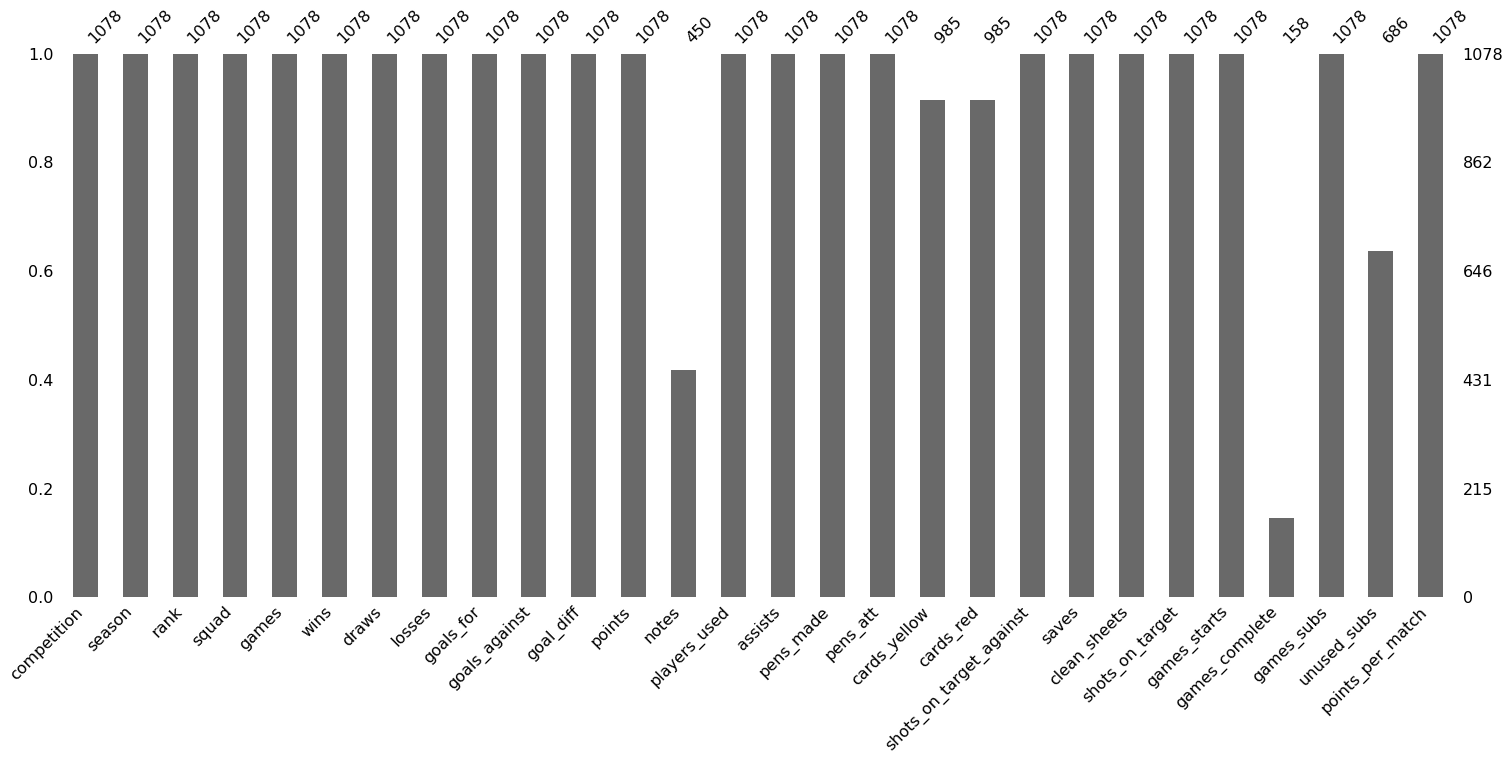

In [ ]:
msno.bar(df)

- From the bar plot we can see that the not-null values in Column = {'notes', 'games_complete'} is less than 50% of their original column size.


In [ ]:
df.drop(['notes', 'games_complete'], axis=1, inplace=True)

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
(total_missing/total_cells) * 100

2.0622234907949193

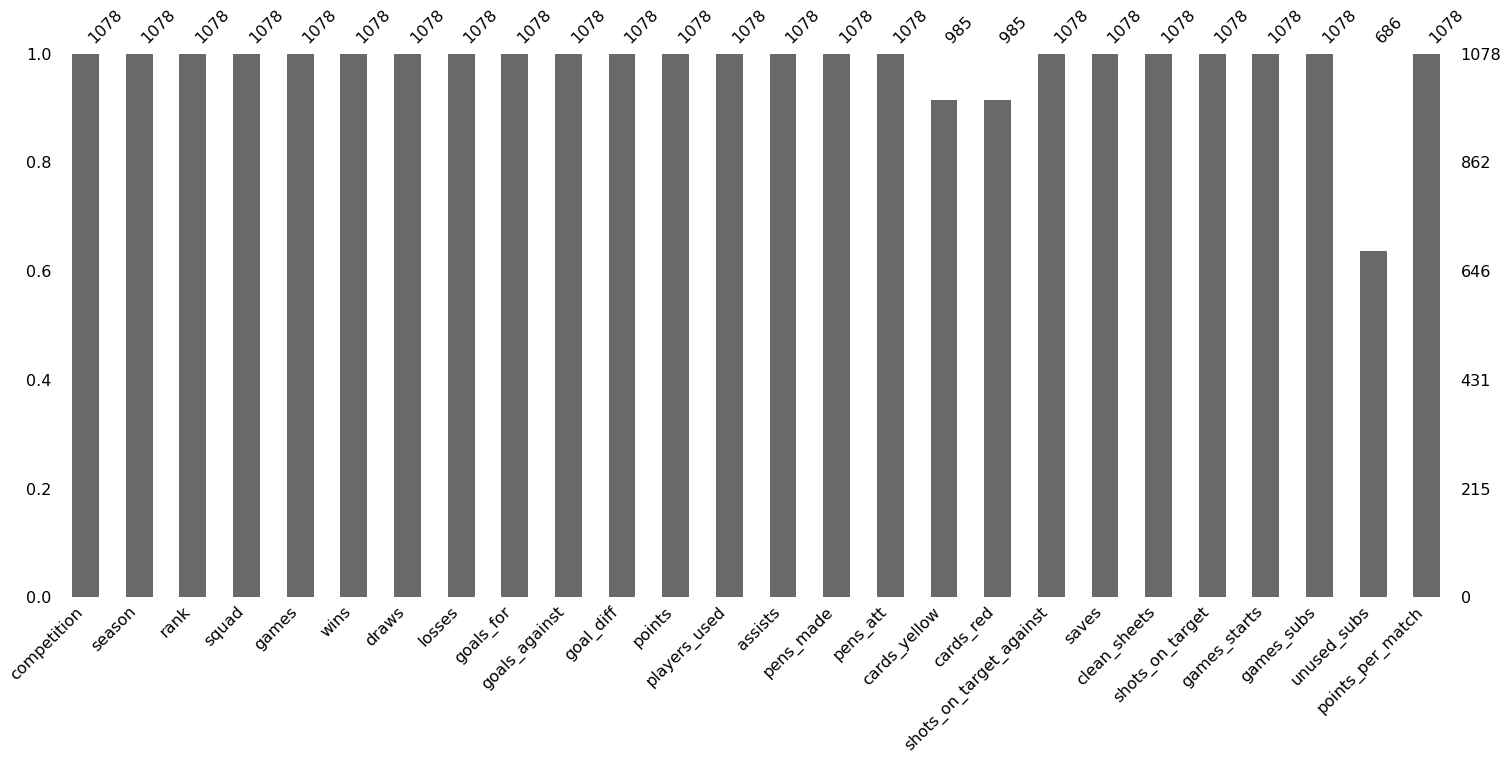

In [ ]:
msno.bar(df)

In [ ]:
df[df['cards_yellow'].isna()].head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,unused_subs,points_per_match
140,Premier League,2017-2018,1,Manchester City,38,32,4,2,106,27,...,NaN,NaN,82,56,18,255,418,106,158.0,2.63
141,Premier League,2017-2018,2,Manchester Utd,38,25,6,7,68,28,...,NaN,NaN,143,117,19,176,418,111,155.0,2.13
142,Premier League,2017-2018,3,Tottenham,38,23,8,7,74,36,...,NaN,NaN,123,89,16,212,418,108,157.0,2.03
143,Premier League,2017-2018,4,Liverpool,38,21,12,5,84,38,...,NaN,NaN,96,60,17,228,418,111,155.0,1.97
144,Premier League,2017-2018,5,Chelsea,38,21,7,10,62,38,...,NaN,NaN,116,81,16,209,418,109,157.0,1.84


In [ ]:
df[df['cards_red'].isna()].head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,unused_subs,points_per_match
140,Premier League,2017-2018,1,Manchester City,38,32,4,2,106,27,...,NaN,NaN,82,56,18,255,418,106,158.0,2.63
141,Premier League,2017-2018,2,Manchester Utd,38,25,6,7,68,28,...,NaN,NaN,143,117,19,176,418,111,155.0,2.13
142,Premier League,2017-2018,3,Tottenham,38,23,8,7,74,36,...,NaN,NaN,123,89,16,212,418,108,157.0,2.03
143,Premier League,2017-2018,4,Liverpool,38,21,12,5,84,38,...,NaN,NaN,96,60,17,228,418,111,155.0,1.97
144,Premier League,2017-2018,5,Chelsea,38,21,7,10,62,38,...,NaN,NaN,116,81,16,209,418,109,157.0,1.84


In [ ]:
# Replacing missing data in 'cards_yellow', 'cards_red' & 'unused_subs' with 0 since their data is missing

df['cards_yellow'] = df['cards_yellow'].replace(np.nan, 0)
df['cards_red'] = df['cards_red'].replace(np.nan, 0)
df['unused_subs'] = df['unused_subs'].replace(np.nan, 0)

In [ ]:
df.isnull().sum()

competition                0
season                     0
rank                       0
squad                      0
games                      0
wins                       0
draws                      0
losses                     0
goals_for                  0
goals_against              0
goal_diff                  0
points                     0
players_used               0
assists                    0
pens_made                  0
pens_att                   0
cards_yellow               0
cards_red                  0
shots_on_target_against    0
saves                      0
clean_sheets               0
shots_on_target            0
games_starts               0
games_subs                 0
unused_subs                0
points_per_match           0
dtype: int64

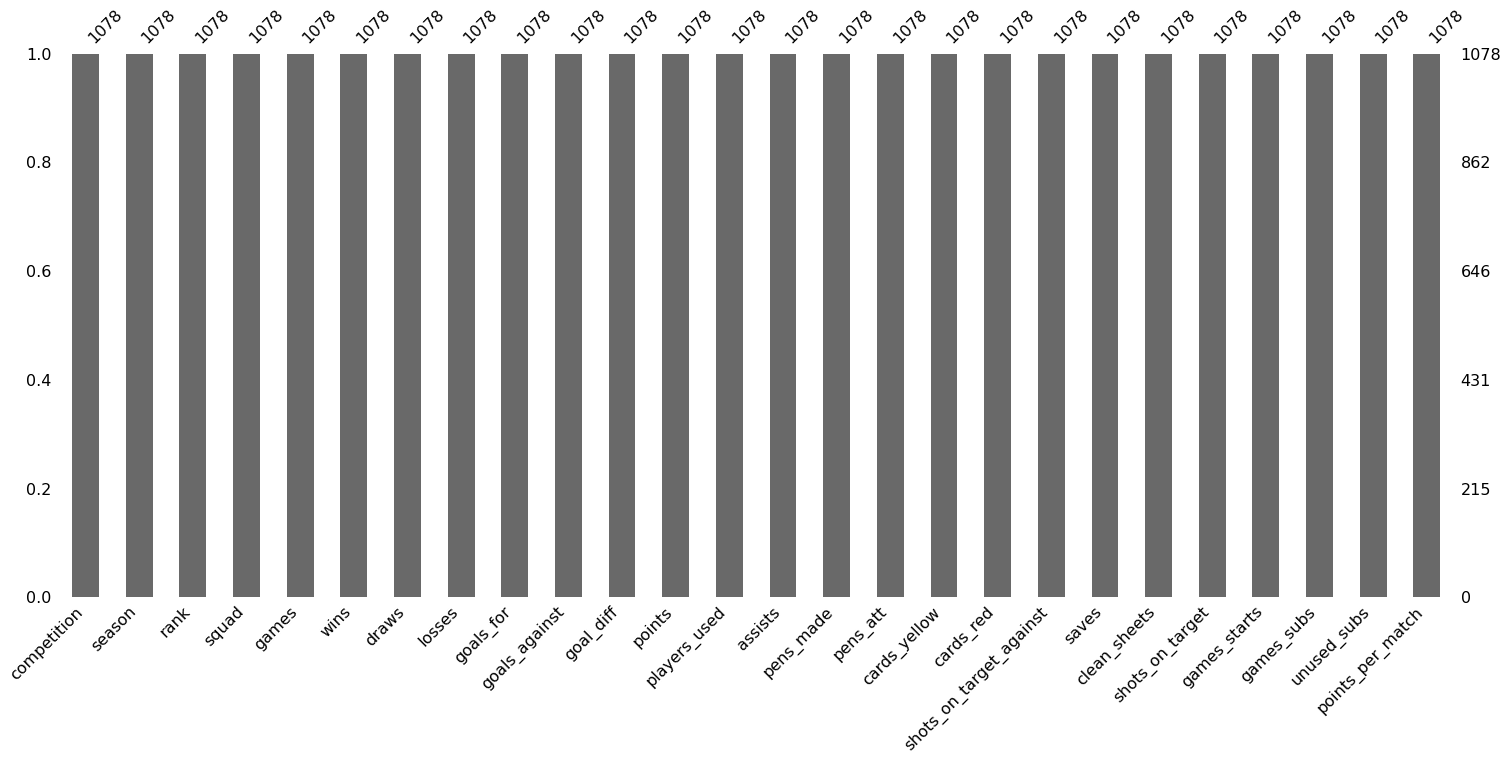

In [ ]:
msno.bar(df)

**Now the Data has been cleaned completely**

# Exploratory Data Analysis


- **Correlation Matrix**: The correlation matrix allows you to have a global view of the more or less strong relationship between several variables.

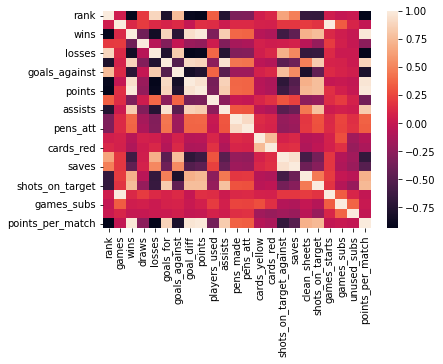

In [ ]:
sns.heatmap(df.corr())

- **Box Plot**: In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

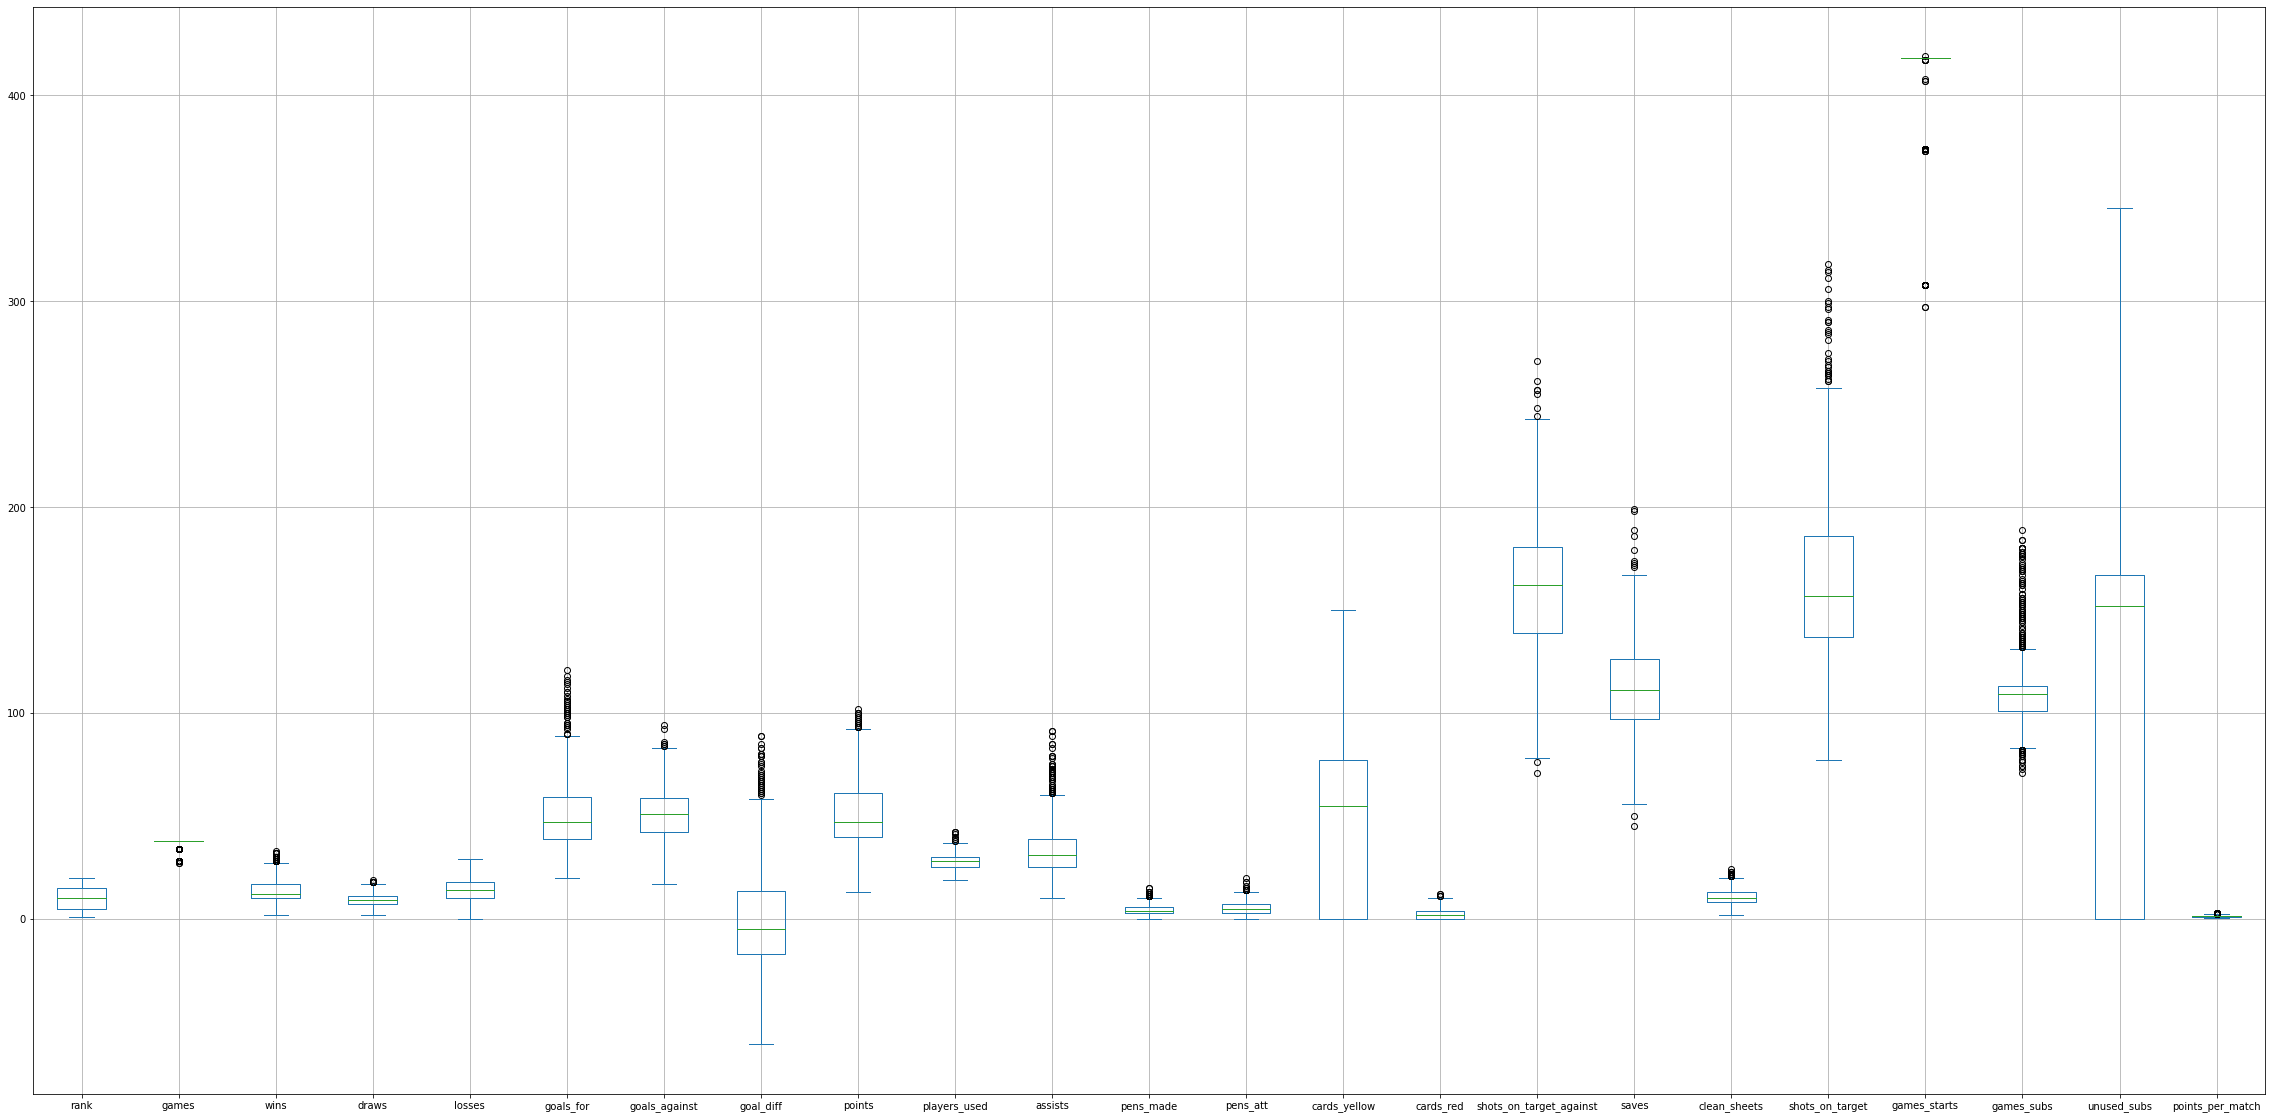

In [ ]:
df.plot(kind="box", grid='True', figsize=(40, 20))

- To know how many Soccer Leagues:

In [ ]:
df['competition'].unique()

array(['Premier League', 'Ligue 1', 'Fußball-Bundesliga', 'Serie A',
       'La Liga'], dtype=object)

- To know how many seasons have been played:

In [ ]:
df['season'].unique()

array(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020',
       '2020-2021'], dtype=object)

In [ ]:
df['squad'].unique()

array(['Manchester Utd', 'Chelsea', 'Manchester City', 'Arsenal',
       'Tottenham', 'Liverpool', 'Everton', 'Fulham', 'Aston Villa',
       'Sunderland', 'West Brom', 'Newcastle Utd', 'Stoke City', 'Bolton',
       'Blackburn', 'Wigan Athletic', 'Wolves', 'Birmingham City',
       'Blackpool', 'West Ham', 'Swansea City', 'Norwich City', 'QPR',
       'Southampton', 'Reading', 'Crystal Palace', 'Hull City',
       'Cardiff City', 'Leicester City', 'Burnley', 'Watford',
       'Bournemouth', 'Middlesbrough', 'Brighton', 'Huddersfield',
       'Sheffield Utd', 'Leeds United', 'Lille', 'Marseille', 'Lyon',
       'Paris S-G', 'Sochaux', 'Rennes', 'Bordeaux', 'Toulouse',
       'Auxerre', 'Saint-Étienne', 'Lorient', 'Valenciennes', 'Nancy',
       'Montpellier', 'Caen', 'Brest', 'Nice', 'Monaco', 'Lens',
       'Arles-Avignon', 'Evian', 'Ajaccio', 'Dijon', 'Bastia', 'Reims',
       'Troyes', 'Nantes', 'Guingamp', 'Metz', 'Angers',
       'Gazélec Ajaccio', 'Amiens', 'Strasbourg', 'Nîmes',

#### How a league can be perfectly competitive

A league can be said perfectly competitive if:
- If every team plays with other team twice
- Every team has 50% chance to win
- If team wins assign 3 points or else assign 0 points

We can repeat this process for 11 seasons

# How to know if League is competitive or not?


- **Goals per game**: Which league has the most free-scoring football. While not necessarily an indicator of quality, it gives us an impression of which leagues give the fans best entertainment on a regular basis.
- **Disciplinary records**: By ranking each league by the number of yellow and red cards received per game, with red cards counting as three times the value, we can compare competitions by their concepts of "fair play." Of course, it is a statistic that relies heavily on refereeing consistency, which cannot be in any way guaranteed.
- **Standard Deviation of points totals**: Just how spread-out are the points totals of sides within the division? The standard deviation gives us a clear indication of which leagues are more balanced in level than others. The larger the coefficient, the bigger the gulf in points totals.

### Calculating Goals per Game

In [ ]:
goals = []
for i in df['competition'].unique():
  sum = df[df['competition'] == i]['goals_for'].sum(axis = 0)
  count = df[df['competition'] == i]['games'].mean()
  goals.append([i, sum/count])

In [ ]:
goals

[['Premier League', 301.5],
 ['Ligue 1', 280.4608972787448],
 ['Fußball-Bundesliga', 292.88235294117646],
 ['Serie A', 301.1578947368421],
 ['La Liga', 297.36842105263156]]

In [ ]:
goals_per_game = pd.DataFrame(goals, columns=['Name', 'Goals_Per_Game'])
goals_per_game

,Name,Goals_Per_Game
0,Premier League,301.500000
1,Ligue 1,280.460897
2,Fußball-Bundesliga,292.882353
3,Serie A,301.157895
4,La Liga,297.368421


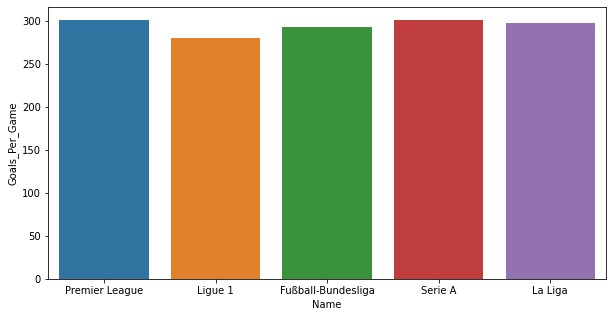

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'Name',
            y = 'Goals_Per_Game',
            data = goals_per_game)

plt.show()

<font color='red'>**In terms of Goals per Game, 'Premier League' has highest Ratio**</font>

### Disciplinary records: Fair Play



In [ ]:
def w_avg(red, yellow):
  return (3*red + yellow)/4

name = []
red = []
yellow = []
wavg = []
leag = []

for i in df['competition'].unique():
  cards_red = df[df['competition'] == i]['cards_red'].sum(axis = 0)
  cards_yellow = df[df['competition'] == i]['cards_yellow'].sum(axis = 0)
  count = df[df['competition'] == i]['games'].mean()
  name.append(i)
  red.append(cards_red/count) # the value of red card is three time yellow card
  yellow.append(cards_yellow/count)
  wavg.append(w_avg(cards_red/count, cards_yellow/count))
  leag.append(i)

In [ ]:
cards_per_game = pd.DataFrame({'Red Cards per Game': red, 'Yellow Cards per Game': yellow}, index=name)
cards_per_game

,Red Cards per Game,Yellow Cards per Game
Premier League,8.947368,189.894737
Ligue 1,16.072567,210.615347
Fußball-Bundesliga,9.941176,194.500000
Serie A,16.710526,273.894737
La Liga,20.500000,412.500000


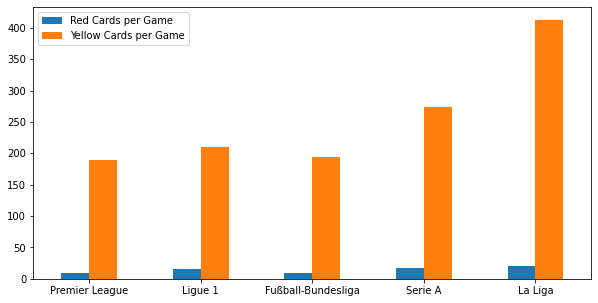

In [ ]:
cards_per_game.plot.bar(rot=0, figsize=(10, 5))

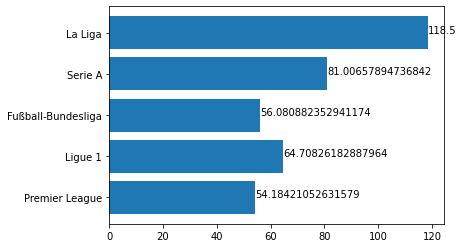

In [ ]:
plt.barh(leag, wavg)

for index, value in enumerate(wavg):
    plt.text(value, index, str(value))

plt.show()

<font color='red'>**In terms of fairness 'La Liga' has highest ratio**</font>

### Standard Deviation of points totals

In [ ]:
sds = []
for i in df['competition'].unique():
  s = df[df['competition'] == i]['points'].std()
  sds.append([i, s])

In [ ]:
sds

[['Premier League', 17.35200661783591],
 ['Ligue 1', 15.318616938438021],
 ['Fußball-Bundesliga', 14.821970746072056],
 ['Serie A', 17.729260886265585],
 ['La Liga', 17.45345229730296]]

In [ ]:
std_dev = pd.DataFrame(sds, columns=['Name', 'Standard Deviation'])
std_dev

,Name,Standard Deviation
0,Premier League,17.352007
1,Ligue 1,15.318617
2,Fußball-Bundesliga,14.821971
3,Serie A,17.729261
4,La Liga,17.453452


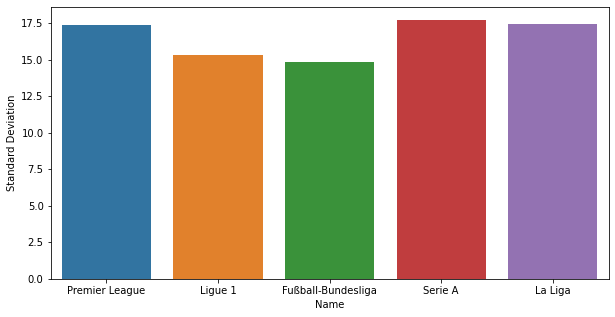

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x = 'Name',
            y = 'Standard Deviation',
            data = std_dev)

plt.show()

<font color='red'>**In terms of standard deviation of points 'Serie A' has highest Standard Deviation**</font>

# FINAL COMPARISON OF LEAGUES

In [ ]:
name = []
red = []
yellow = []
goals = []
sds = []
mean = []

for i in df['competition'].unique():
  sum = df[df['competition'] == i]['goals_for'].sum(axis = 0)
  count = df[df['competition'] == i]['games'].mean()
  goals.append(sum/count)

  cards_red = df[df['competition'] == i]['cards_red'].sum(axis = 0)
  cards_yellow = df[df['competition'] == i]['cards_yellow'].sum(axis = 0)
  count = df[df['competition'] == i]['games'].mean()
  name.append(i)
  red.append((3*cards_red)/count) # the value of red card is three time yellow card
  yellow.append(cards_yellow/count)

  s = df[df['competition'] == i]['points'].std()
  sds.append(s)

  mean.append(((sum/count) +((3*cards_red)/count) + (cards_yellow/count) + s)/4)

league = pd.DataFrame({'Goals per Game':goals ,'Red Cards per Game': red, 'Yellow Cards per Game': yellow, 'Standard Deviation': sds, 'mean': mean}, index=name)
league

,Goals per Game,Red Cards per Game,Yellow Cards per Game,Standard Deviation,mean
Premier League,301.500000,26.842105,189.894737,17.352007,133.897212
Ligue 1,280.460897,48.217700,210.615347,15.318617,138.653140
Fußball-Bundesliga,292.882353,29.823529,194.500000,14.821971,133.006963
Serie A,301.157895,50.131579,273.894737,17.729261,160.728368
La Liga,297.368421,61.500000,412.500000,17.453452,197.205468


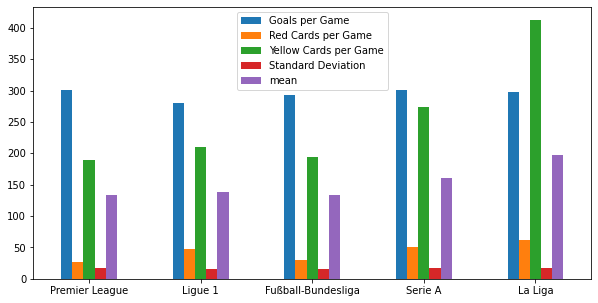

In [ ]:
league.plot.bar(rot=0, figsize=(10, 5))

<font color='yellow'>**THUS, WE CAN CONCLUDE THAT LEAGUE = 'La Liga' IS A
BETTER LEAGUE THAN OTHERS**</font>

# DECISION TREE


In [ ]:
df.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,unused_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,56.0,3.0,139,102,15,218,418,99,0.0,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,59.0,1.0,148,115,15,241,418,107,0.0,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,71.0,5.0,153,120,18,182,418,102,0.0,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,65.0,6.0,150,106,13,243,418,107,0.0,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,50.0,2.0,183,137,8,202,418,96,0.0,1.63


In [ ]:
df.isnull().sum()

competition                0
season                     0
rank                       0
squad                      0
games                      0
wins                       0
draws                      0
losses                     0
goals_for                  0
goals_against              0
goal_diff                  0
points                     0
players_used               0
assists                    0
pens_made                  0
pens_att                   0
cards_yellow               0
cards_red                  0
shots_on_target_against    0
saves                      0
clean_sheets               0
shots_on_target            0
games_starts               0
games_subs                 0
unused_subs                0
points_per_match           0
dtype: int64

In [ ]:
x = df.drop(['points'], axis=1)
y = df['points']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((862, 25), (216, 25))

In [ ]:
# check data types in X_train

X_train.dtypes

competition                 object
season                      object
rank                         int64
squad                       object
games                        int64
wins                         int64
draws                        int64
losses                       int64
goals_for                    int64
goals_against                int64
goal_diff                    int64
players_used                 int64
assists                      int64
pens_made                    int64
pens_att                     int64
cards_yellow               float64
cards_red                  float64
shots_on_target_against      int64
saves                        int64
clean_sheets                 int64
shots_on_target              int64
games_starts                 int64
games_subs                   int64
unused_subs                float64
points_per_match           float64
dtype: object

In [ ]:
X_train.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,unused_subs,points_per_match
875,La Liga,2010-2011,18,La Coruña,38,10,13,15,31,47,...,86.0,5.0,184,137,13,134,418,113,0.0,1.13
949,La Liga,2014-2015,12,Real Sociedad,38,11,13,14,44,51,...,0.0,0.0,170,119,8,147,418,110,155.0,1.21
618,Fußball-Bundesliga,2019-2020,17,Düsseldorf,34,6,12,16,36,67,...,78.0,0.0,171,111,4,114,374,115,188.0,0.88
881,La Liga,2011-2012,4,Málaga,38,17,7,14,54,53,...,73.0,7.0,159,113,10,229,418,113,0.0,1.53
590,Fußball-Bundesliga,2018-2019,7,Eint Frankfurt,34,15,9,10,60,48,...,58.0,3.0,167,121,9,146,374,93,145.0,1.59


In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 719 kB/s 


In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['competition', 'season', 'squad'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,unused_subs,points_per_match
875,1,1,18,1,38,10,13,15,31,47,...,86.0,5.0,184,137,13,134,418,113,0.0,1.13
949,1,2,12,2,38,11,13,14,44,51,...,0.0,0.0,170,119,8,147,418,110,155.0,1.21
618,2,3,17,3,34,6,12,16,36,67,...,78.0,0.0,171,111,4,114,374,115,188.0,0.88
881,1,4,4,4,38,17,7,14,54,53,...,73.0,7.0,159,113,10,229,418,113,0.0,1.53
590,2,5,7,5,34,15,9,10,60,48,...,58.0,3.0,167,121,9,146,374,93,145.0,1.59


In [ ]:
X_test.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_yellow,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_subs,unused_subs,points_per_match
423,3,7,4,42.0,38,22,10,6,81,43,...,66.0,10.0,130,94,11,222,418,175,161.0,2.00
548,2,6,1,50.0,34,25,7,2,89,22,...,0.0,0.0,100,78,17,230,374,99,139.0,2.41
837,4,3,20,155.0,38,5,5,28,27,77,...,98.0,4.0,222,155,3,114,418,129,307.0,0.53
587,2,5,4,23.0,34,18,4,12,69,52,...,50.0,1.0,137,91,9,188,374,93,144.0,1.71
864,1,1,7,48.0,38,17,7,14,62,53,...,105.0,5.0,199,146,11,213,418,105,0.0,1.53


In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8333


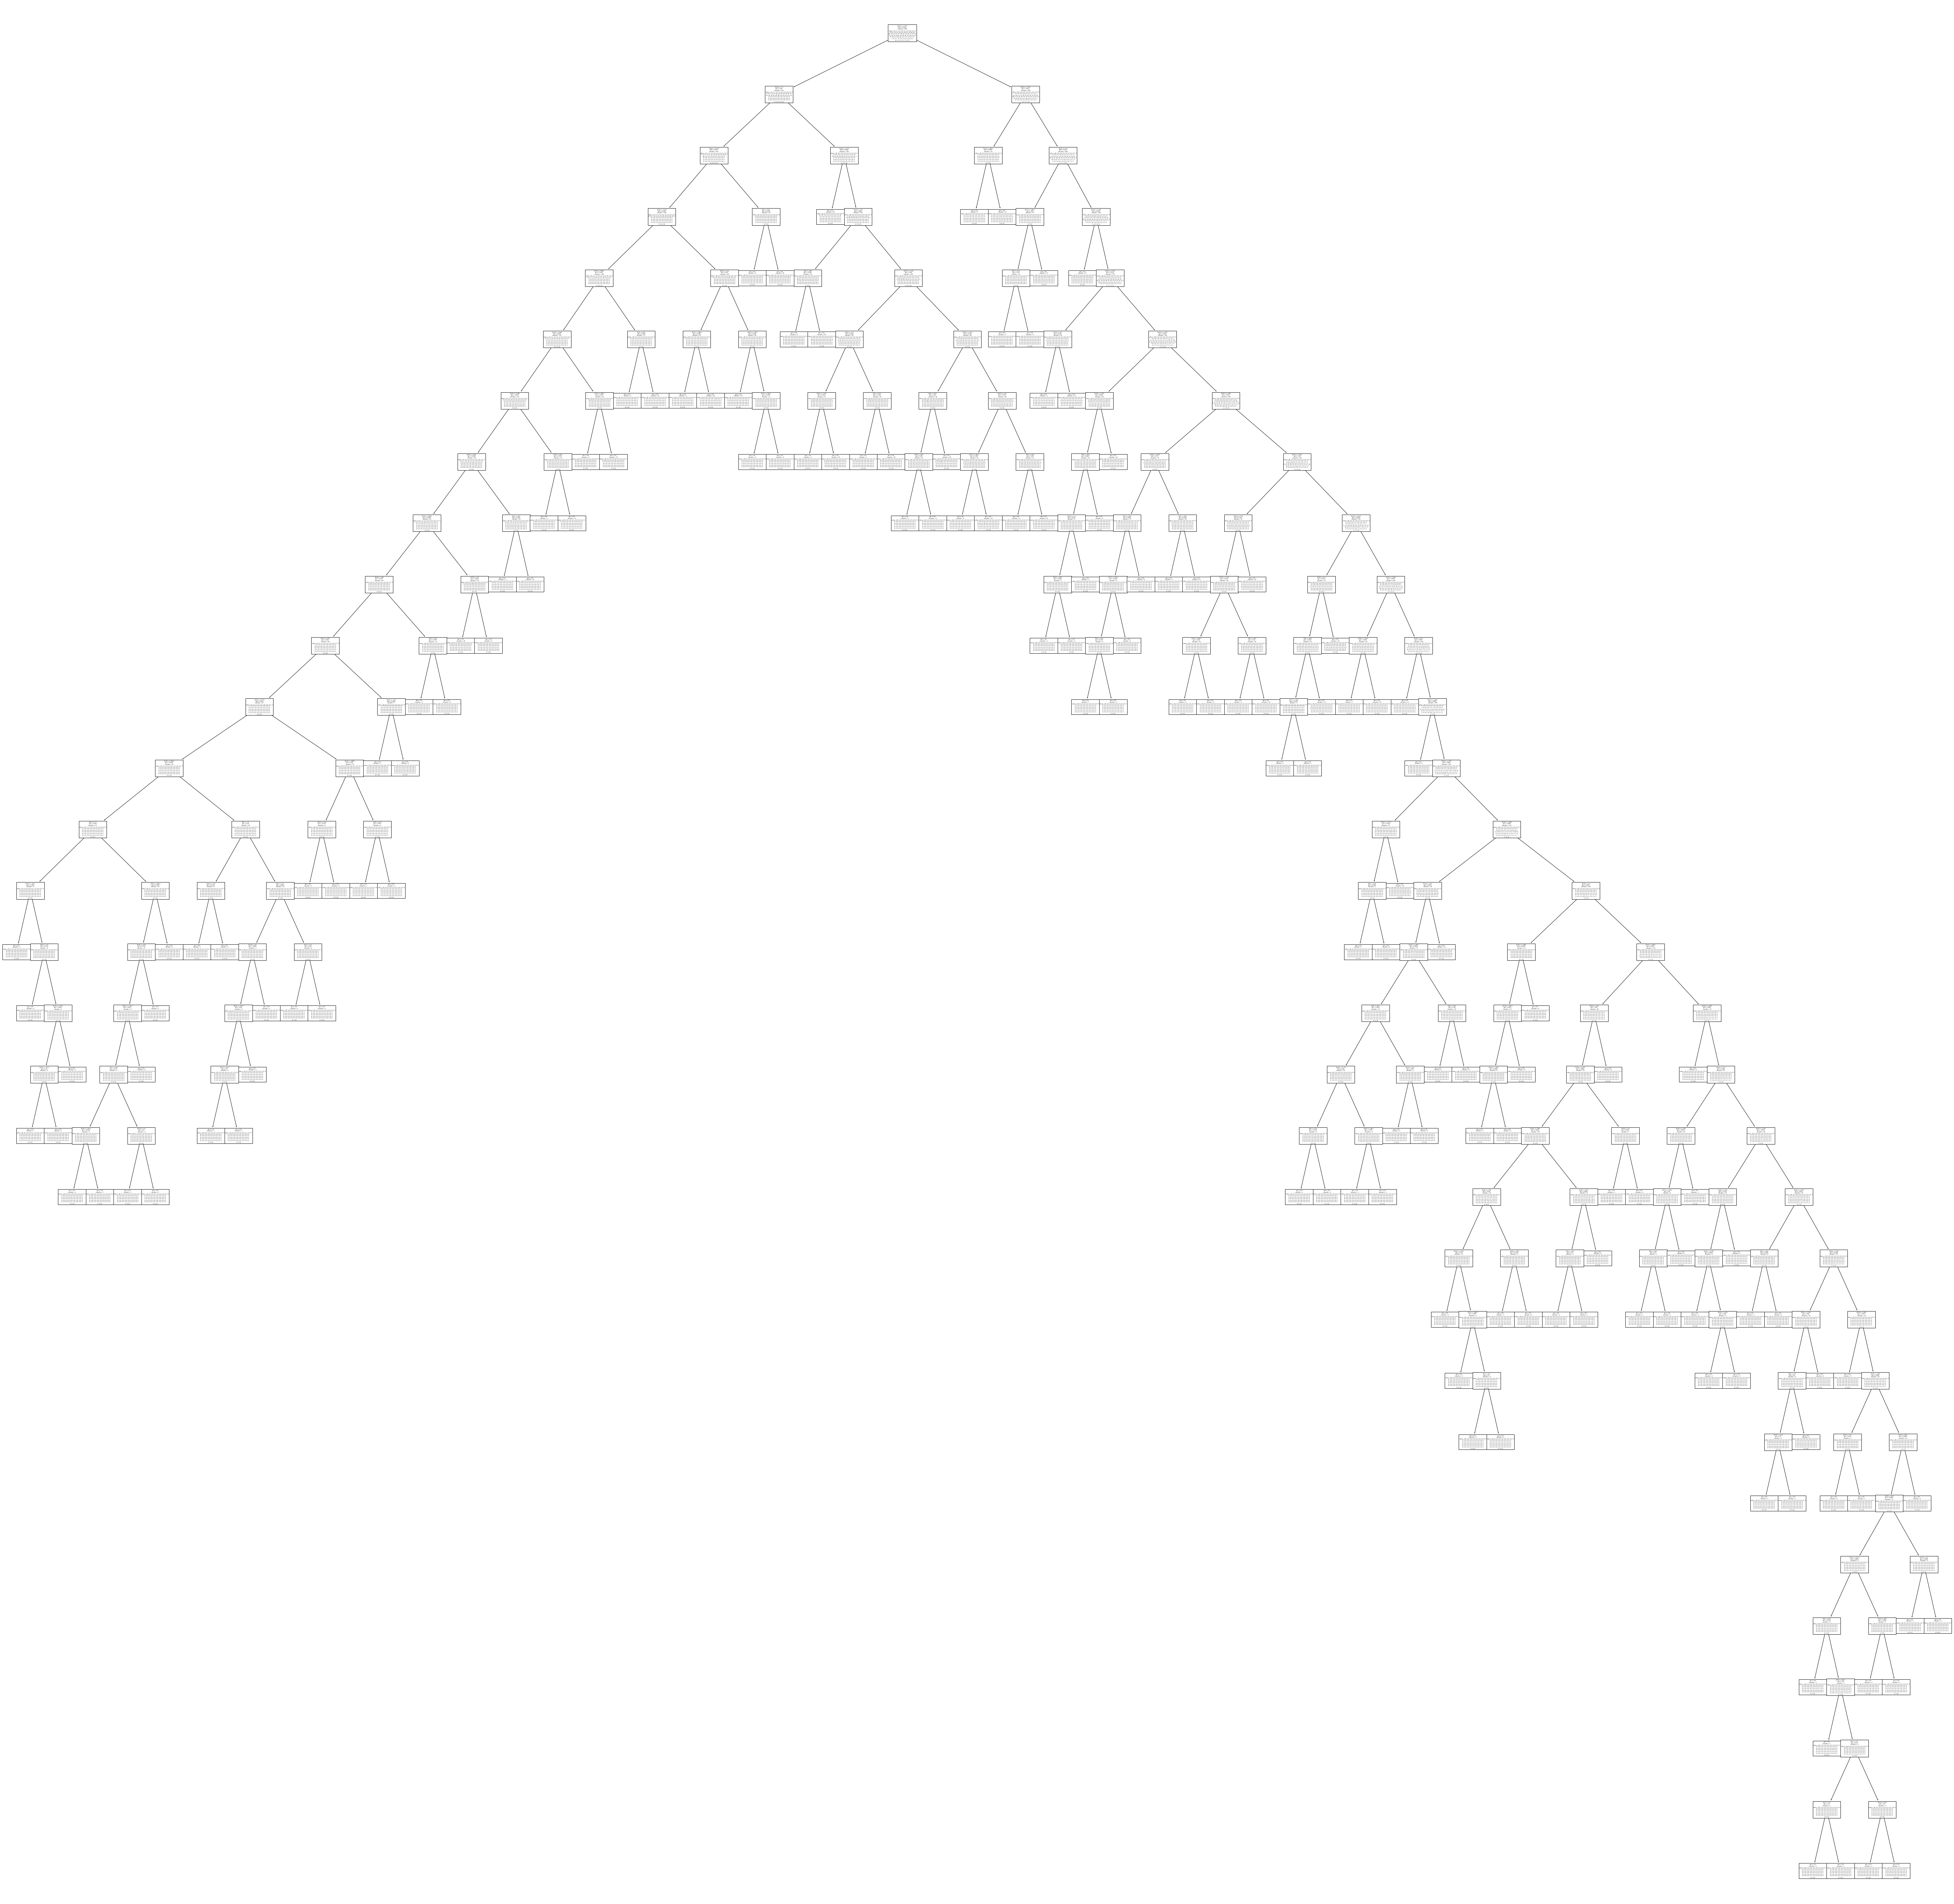

In [ ]:
fig = plt.figure(figsize=(100,100))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
fig.savefig("decistion_tree.png")

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction = LR.predict(X_test)
y_prediction

array([76.03691495, 82.61443368, 20.0292609 , 58.35835592, 57.99355434,
       35.79478482, 46.05338527, 45.05313709, 76.59227829, 86.98698344,
       63.91872214, 36.88045218, 34.77900552, 33.00894372, 55.04074986,
       43.89601099, 47.86437732, 71.56021499, 77.96198418, 46.97904297,
       38.91857018, 44.90404693, 43.94516882, 52.98500446, 33.76144301,
       63.08592502, 38.98725379, 47.11882296, 77.92201711, 90.82976832,
       35.9196113 , 86.85605486, 42.98395371, 38.00747512, 39.96290487,
       35.7687643 , 86.97042679, 59.89029636, 49.00649513, 35.96594539,
       51.98373483, 57.02257915, 51.01310339, 37.00987316, 46.06211584,
       49.99666029, 53.99323515, 47.02605935, 56.95683403, 37.86621956,
       43.90535645, 20.49674881, 74.96691374, 20.97861793, 27.70392108,
       30.7617383 , 42.03016106, 40.97209393, 39.80312312, 90.84225208,
       75.53911308, 53.95767702, 46.96990391, 49.00523366, 21.83924562,
       19.41477058, 36.04036475, 66.43789744, 78.51567082, 65.92

In [ ]:
score = r2_score(y_test, y_prediction)
score*100

99.98099107209535

In [ ]:
LR.coef_.shape

(25,)

In [ ]:
LR.coef_

array([-1.25120447e-02, -3.38426026e-04, -5.01460364e-03, -1.55336662e-04,
        1.06421505e+00,  1.74766984e+00,  7.64066426e-02, -7.59861428e-01,
        2.70450407e-03,  6.97938406e-03, -4.27488000e-03, -1.12981100e-02,
       -1.00910842e-03,  9.04437932e-03, -5.24183677e-03, -7.97042528e-04,
        2.96811558e-03, -1.10567712e-02,  1.05261210e-02, -1.31228171e-02,
        1.01449026e-03, -6.95354047e-03, -1.51955492e-04, -2.05053246e-05,
        6.17498453e+00])

# Saving the model


In [ ]:
import pickle

# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
LR_pkl_filename = 'LinearRegression.pkl'

# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(clf_gini, DT_Model_pkl)
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LR, LR_Model_pkl)

# Close the pickle instances
DT_Model_pkl.close()
LR_Model_pkl.close()

# Testing on sample Data

In [ ]:
# create an iterator object with write permission
with open('DecisionTree.pkl', 'rb') as files:
    model_dt = pickle.load(files)
with open('LinearRegression.pkl', 'rb') as files:
    model_lr = pickle.load(files)

In [ ]:
print(model_dt.predict(np.array([[1, 1, 5, 4, 40, 20, 10, 10, 60, 40, 5, 29, 60, 5, 5, 60, 5, 140, 100, 20, 200, 400, 99, 0, 2.11]])))

[80]


In [ ]:
print(model_lr.predict(np.array([[1, 1, 5, 4, 40, 20, 10, 10, 60, 40, 5, 29, 60, 5, 5, 60, 5, 140, 100, 20, 200, 400, 99, 0, 2.11]])))

[72.30626659]


# Comparison of Algorithm

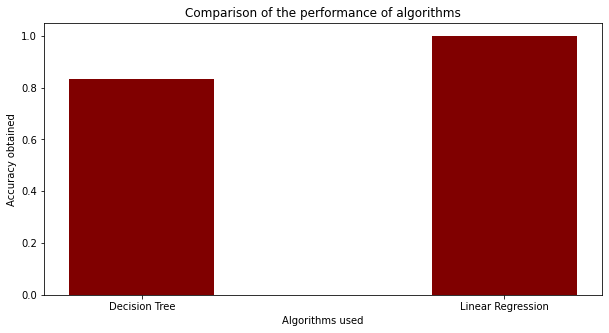

In [ ]:
# creating the dataset
data = {'Decision Tree':clf_gini.score(X_test, y_test),'Linear Regression':r2_score(y_test, y_prediction)}
algorithms = list(data.keys())
accuracy = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(algorithms, accuracy, color ='maroon',width = 0.4)

plt.xlabel("Algorithms used")
plt.ylabel("Accuracy obtained")
plt.title("Comparison of the performance of algorithms")
plt.show()

<font color='yellow'>**LINEAR REGRESSION IS GIVING HIGHER ACCURACY**</font>